# Assignment #4 - Linear Regression & Logistic Regression
## 0813366 黃柏翔

## Linear Regression

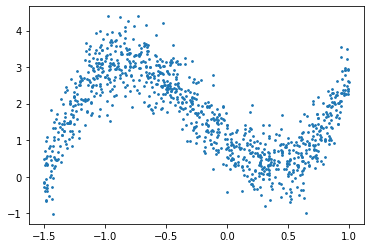

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command

xi = np.random.uniform(-1.5,1,1000)
s = np.random.normal(0, 0.5, 1000)
xi = np.sort(xi)

yi = 3*xi**3 +2*xi**2-3*xi+1+s

xi = xi.reshape(-1,1)
yi = yi.reshape(-1,1)

plt.scatter(xi,yi,3)

In [11]:
latex = []
for index, num in enumerate([1,2,3,4]):
    poly = PolynomialFeatures(num)
    k_num = poly.fit_transform(xi)
    reg = LinearRegression().fit(k_num,yi)
    print(k_num)
    print(reg.intercept_, reg.coef_)
    
    l=str(abs(reg.intercept_))
    for i in range(1,num+1):
        if reg.coef_[0][i]<0: l += '-'
        else : l += '+'
        l+=str(abs(reg.coef_[0][i]))+'x_i^'+str(i)
    print(l,'\n')

label = []
label.append( r'$1.56-0.49×x_i$')
label.append( r'$1.71-0.64 × x_i-0.30 × x_i^2$')
label.append( r'$0.99-3.10 × x_i+2.075 × x_i^2+3.10 × x_i^3$')
label.append(r'$0.98-3.09 × x_i+2.10 × x_i^2+3.06 × x_i^3-0.031 × x_i^4$')

[[ 1.         -1.49680908]
 [ 1.         -1.49559821]
 [ 1.         -1.49528812]
 ...
 [ 1.          0.9936914 ]
 [ 1.          0.99622126]
 [ 1.          0.99660559]]
[1.53213229] [[ 0.         -0.62018223]]
[1.53213229]-0.6201822283472732x_i^1 

[[ 1.         -1.49680908  2.24043742]
 [ 1.         -1.49559821  2.236814  ]
 [ 1.         -1.49528812  2.23588655]
 ...
 [ 1.          0.9936914   0.9874226 ]
 [ 1.          0.99622126  0.99245679]
 [ 1.          0.99660559  0.99322269]]
[1.69878674] [[ 0.         -0.79800697 -0.35728245]]
[1.69878674]-0.7980069708792703x_i^1-0.35728244629811373x_i^2 

[[ 1.         -1.49680908  2.24043742 -3.35350708]
 [ 1.         -1.49559821  2.236814   -3.34537502]
 [ 1.         -1.49528812  2.23588655 -3.34329459]
 ...
 [ 1.          0.9936914   0.9874226   0.98119335]
 [ 1.          0.99622126  0.99245679  0.98870655]
 [ 1.          0.99660559  0.99322269  0.98985129]]
[1.01116286] [[ 0.         -3.00697677  1.92963123  2.9701791 ]]
[1.01116286]-3.006

## Result

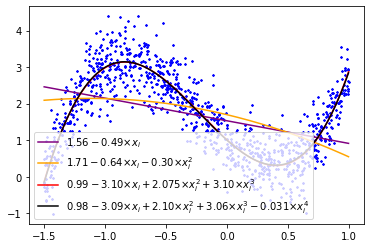

In [12]:
colors = ['purple', 'orange', 'red', 'black']


for index, num in enumerate([1,2,3,4]):
    
    reg = make_pipeline(PolynomialFeatures(num), LinearRegression())
    reg.fit(xi,yi)
    
    pred =  reg.predict(xi)
    plt.scatter(xi,yi,color = 'blue',s = 1)
    plt.plot(xi, pred, color = colors[index], 
            label = label[index])
    plt.legend()
   

## Logistic Regression


acc:  0.984
yi = L(-4.98 + 4.93×Xi0 + 5.20×Xi1)


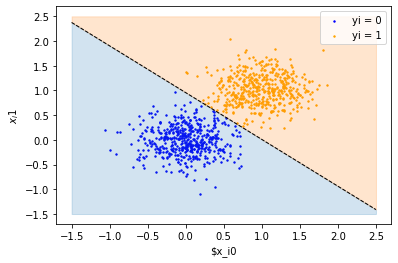

In [138]:
from sklearn.linear_model import LogisticRegression

mean = np.random.randint(2,size=1000)
mean2 = np.vstack([mean,mean]).T
cov = [[0.1, 0], [0, 0.1]]


xi =[]
for i in range(1000):
    xi.append(np.random.multivariate_normal(mean2[i], cov))

xi = np.array(xi)
clf = LogisticRegression().fit(xi, mean)
pred = clf.predict(xi)

# xi = xi.T
# print(xi)
c = ['blue','orange']
xi_0 = []
xi_1 = []
for i, l in enumerate(pred):
    if l == 0:
        xi_0.append(xi[i].tolist())
    else:
        xi_1.append(xi[i].tolist())
        
xi_0 = np.array(xi_0)
xi_1 = np.array(xi_1)
# print(xi_0[:,0])
plt.scatter(xi_0[:,0],xi_0[:,1],color = 'blue',s = 2, label = 'yi = 0')
plt.scatter(xi_1[:,0],xi_1[:,1],color = 'orange',s = 2, label = 'yi = 1')
print('acc: ',clf.score(xi,mean))
print('yi = L({:.2f} + {:.2f}×Xi0 + {:.2f}×Xi1)'.format(clf.intercept_[0],clf.coef_[0][0],clf.coef_[0][1]))


b = clf.intercept_[0]
w1, w2 = clf.coef_.T

c = -b/w2
m = -w1/w2


xmin, xmax = -1.5, 2.5
ymin, ymax = -1.5, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.ylabel(r'$x_i1$')
plt.xlabel(r'$x_i0')
plt.legend()
plt.show()

## Reference:
Plotting the decision boundary of a logistic regression model  
https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/
    